In [1]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration.DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

# Question:
    Does the name of the publisher have a role in increasing the sales?



## 1- Expectations: 
    Yes, publisher name can affect video game sales. According to a study by CAUSEweb, publisher name is one of the factors that impact video game sales1. Publishers help developers navigate the business of game development by offering various services such as public relations and marketing, negotiating with platform holders, and administrative work

## 2- Data Collection: 
    

## Read data 

In [2]:
df = read_data(kind='dataset')

## Handle Missing Values
    - for categorical features: developer, publisher, platform,.. mode imputation is used
    - for ordinal features: rating, year and scores features, median imputation is 
      used as ratio of missingness them is low as shown in data exploration part 

In [3]:
df =handle_missing_values(df,"mode_median" )

Total Number of rows : 16719
Number of rows with missing values: 9894


## Remove Outliers
    number of outliers in sales not too large compared to the data set 
    size, so drop safely

In [4]:
remove_all_outliers(df,['Global_Sales'])
print('Number of original rows: ', df.shape[0])

Number of outliers to be removed from Global_Sales: 1892
Number of original rows:  16719


## Analysis

### Group Global sales by publisher name
     so we can which publishers have the highest mean global sales

In [5]:
#get mean of global sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
print(publisher_sales)

Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.533725
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Hello Games                           1.700000
Valve                                 1.700000
Sony Computer Entertainment Europe    1.558000
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64


### we have too many publishers: 581 from data exploration section 

<Axes: ylabel='Publisher'>

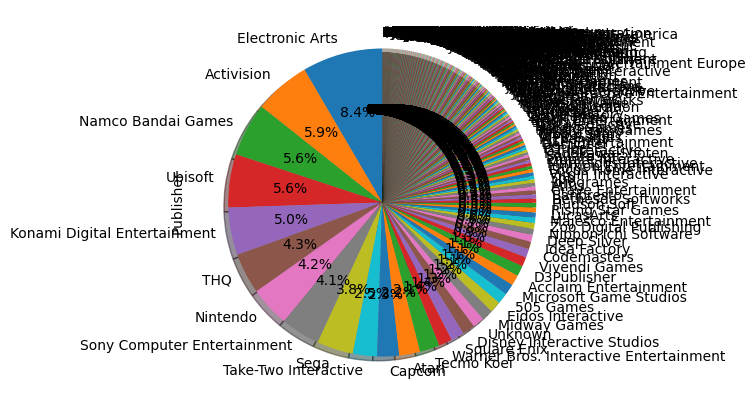

In [6]:
df['Publisher'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', shadow=True, startangle=90)

### Let's see counts for each publisher to avoid misleading

In [7]:
publisher_count = df.groupby('Publisher')['Global_Sales'].count().sort_values(ascending=False)
print(publisher_count)

Publisher
Electronic Arts                 1410
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
New World Computing                1
Simon & Schuster Interactive       1
New                                1
Societa                            1
SCS Software                       1
Name: Global_Sales, Length: 581, dtype: int64


### Result
    many of these publisher has only one game published in our data so it's not correct to 
    consider them in this analysis, specially that one of them with the highest sales, in the
    cell below the publisher with max sales has only one game!! 

In [8]:
print("publisher with max sales: ",publisher_sales.idxmax())
print("#games: ", df[df['Publisher'] ==publisher_sales.idxmax()]['Publisher'].count())


publisher with max sales:  Palcom
#games:  1


### Let's Drop Publisher with less than 100 games published

In [9]:
#Drop Publisher with less than 100 games published
df_dropped = df[df.groupby('Publisher')['Publisher'].transform('count').ge(100)]
publisher_sales_d = df_dropped.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)

### Check minimum count

In [10]:
publisher_count = df_dropped.groupby('Publisher')['Global_Sales'].count().sort_values(ascending=False)
print("Min #games: " ,publisher_count.min())

Min #games:  104


### Top 10 Publishers

#### 1- before dropping

<Axes: title={'center': 'Mean Global Sales by Publisher'}, xlabel='Publisher'>

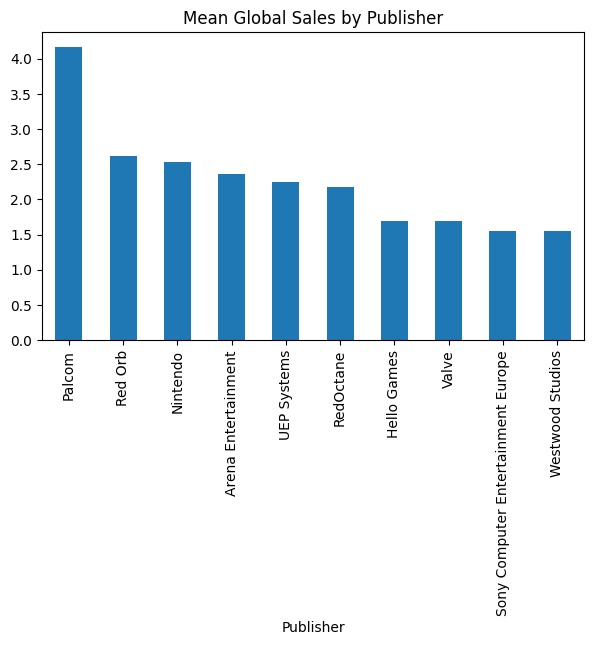

In [11]:
# plot top 10 publishers
publisher_sales.nlargest(10).plot(kind='bar', figsize=(7, 4), title='Mean Global Sales by Publisher')

#### 2- after dropping
    notice the difference, so we avoid incorrect results by dropping publisher 
    with very small count 

<Axes: title={'center': 'Mean Global Sales by Publisher'}, xlabel='Publisher'>

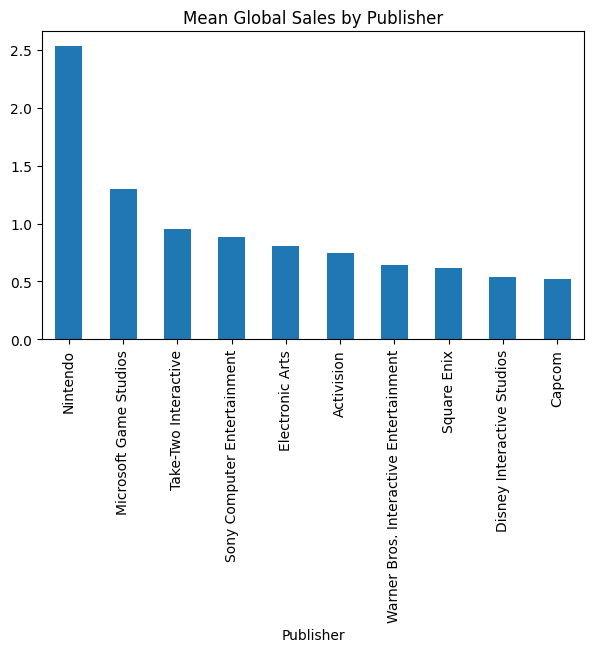

In [12]:
publisher_sales_d.nlargest(10).plot(kind='bar', figsize=(7, 4), title='Mean Global Sales by Publisher')

### For each Genre plot publisher with sales
    - distributions are very similar in all genres, so ... TODO
    - for each genre the publisher with highest global sales is not the same,
      so for each genre there is different publisher has the highest sales


../..\DataExploration\DataExploration.py:97: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


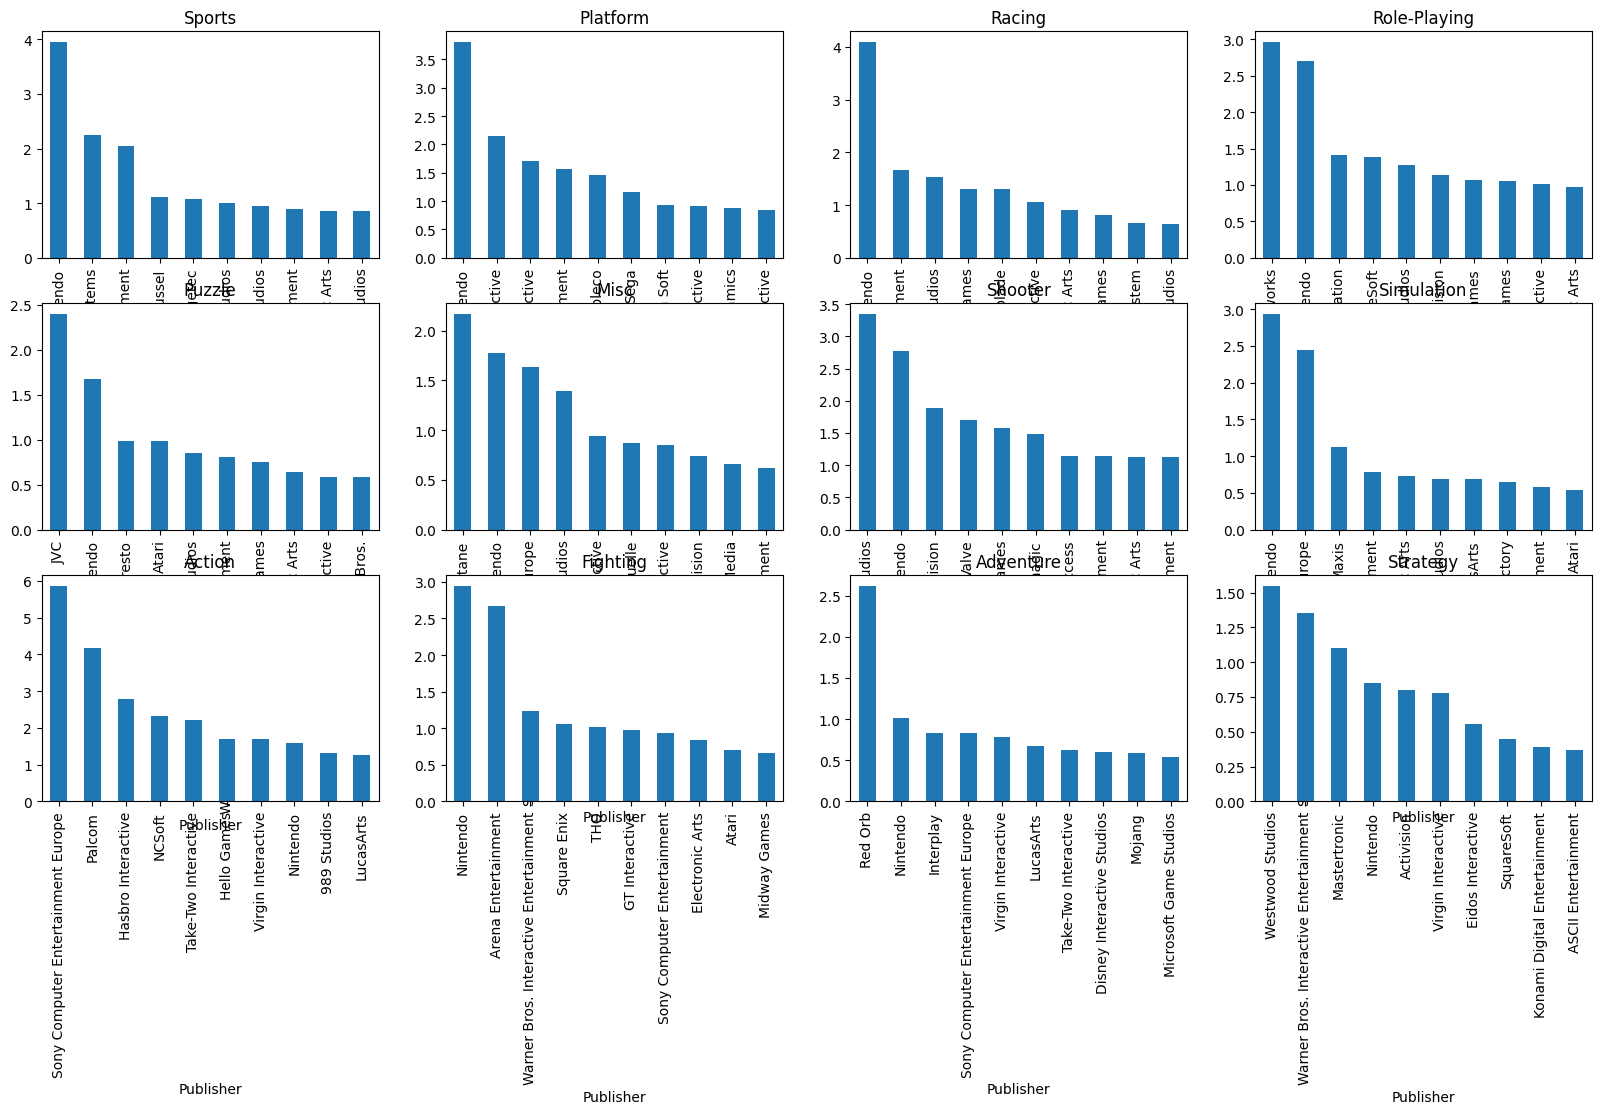

In [13]:
sub_blot(df, "Genre", "Publisher", "Global_Sales", "Mean Global Sales by Publisher for each Genre")

### For each Platform plot publisher with sales
    - distributions are different so there are some platform that sales
      are high for nearly all the publisher However for some platforms that
      most its sales low, there's one publisher that his sales are very
      high compared to others!

../..\DataExploration\DataExploration.py:97: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


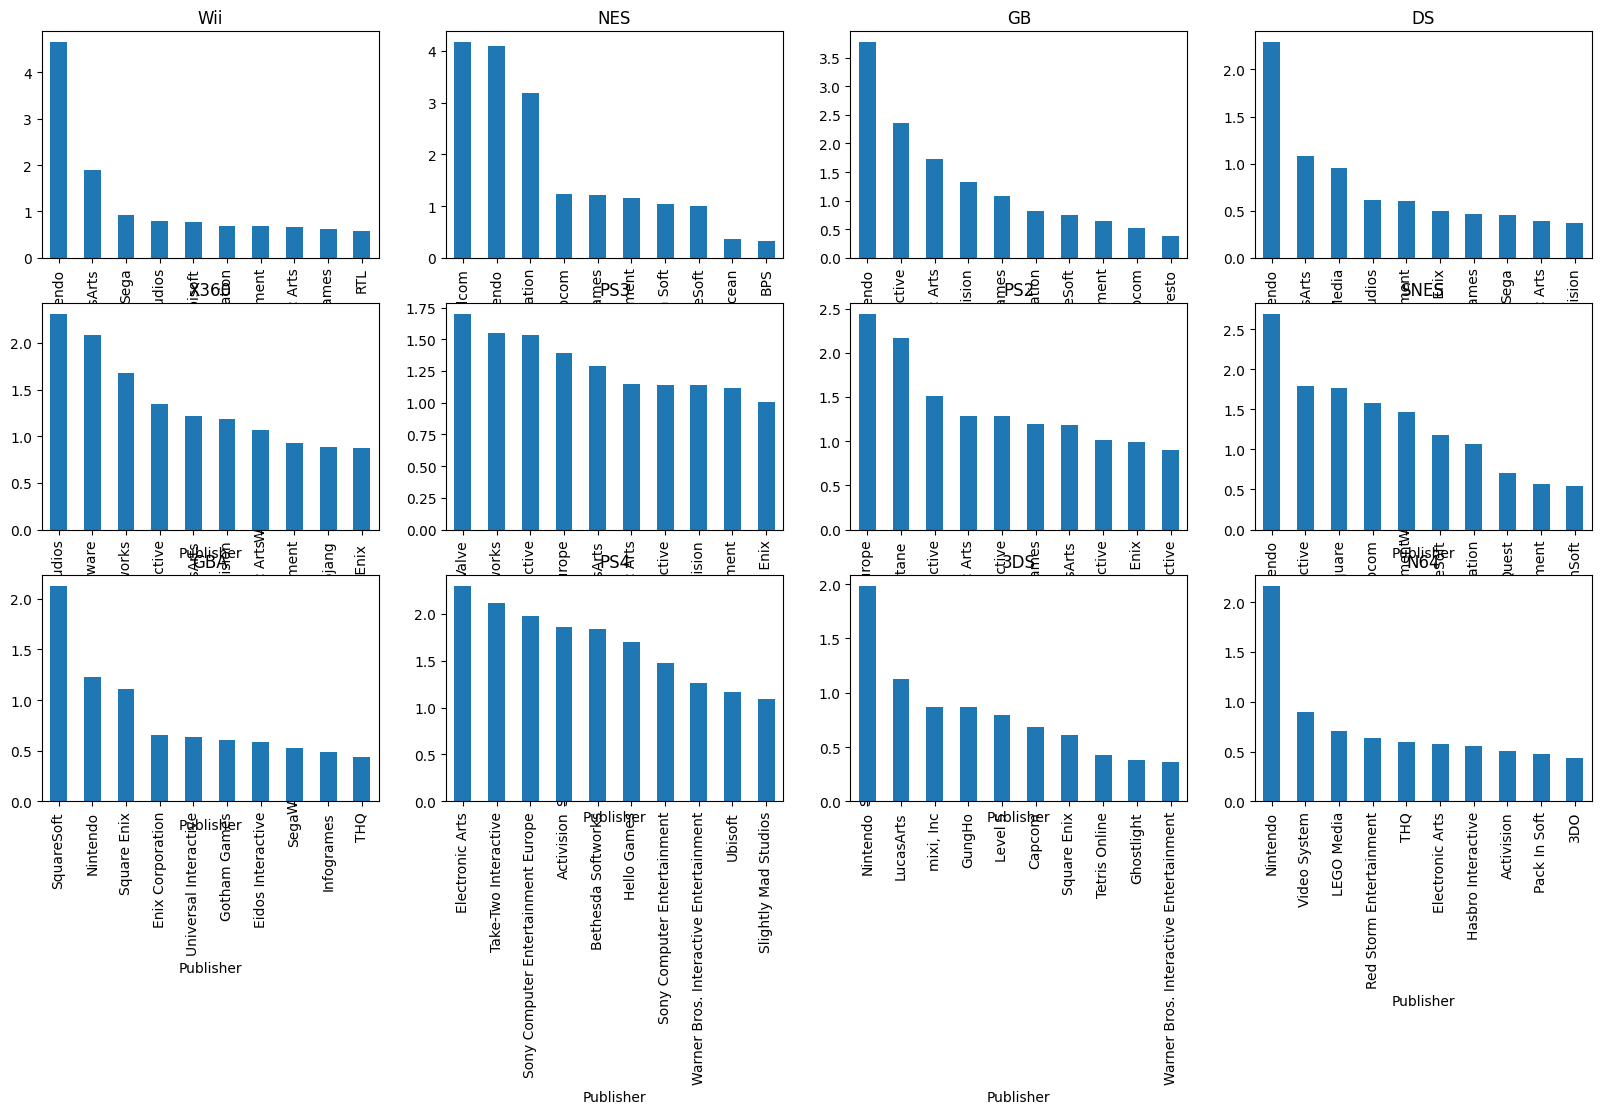

In [22]:
sub_blot(df, "Platform", "Publisher", "Global_Sales", "Mean Global Sales by Publisher for each Genre")

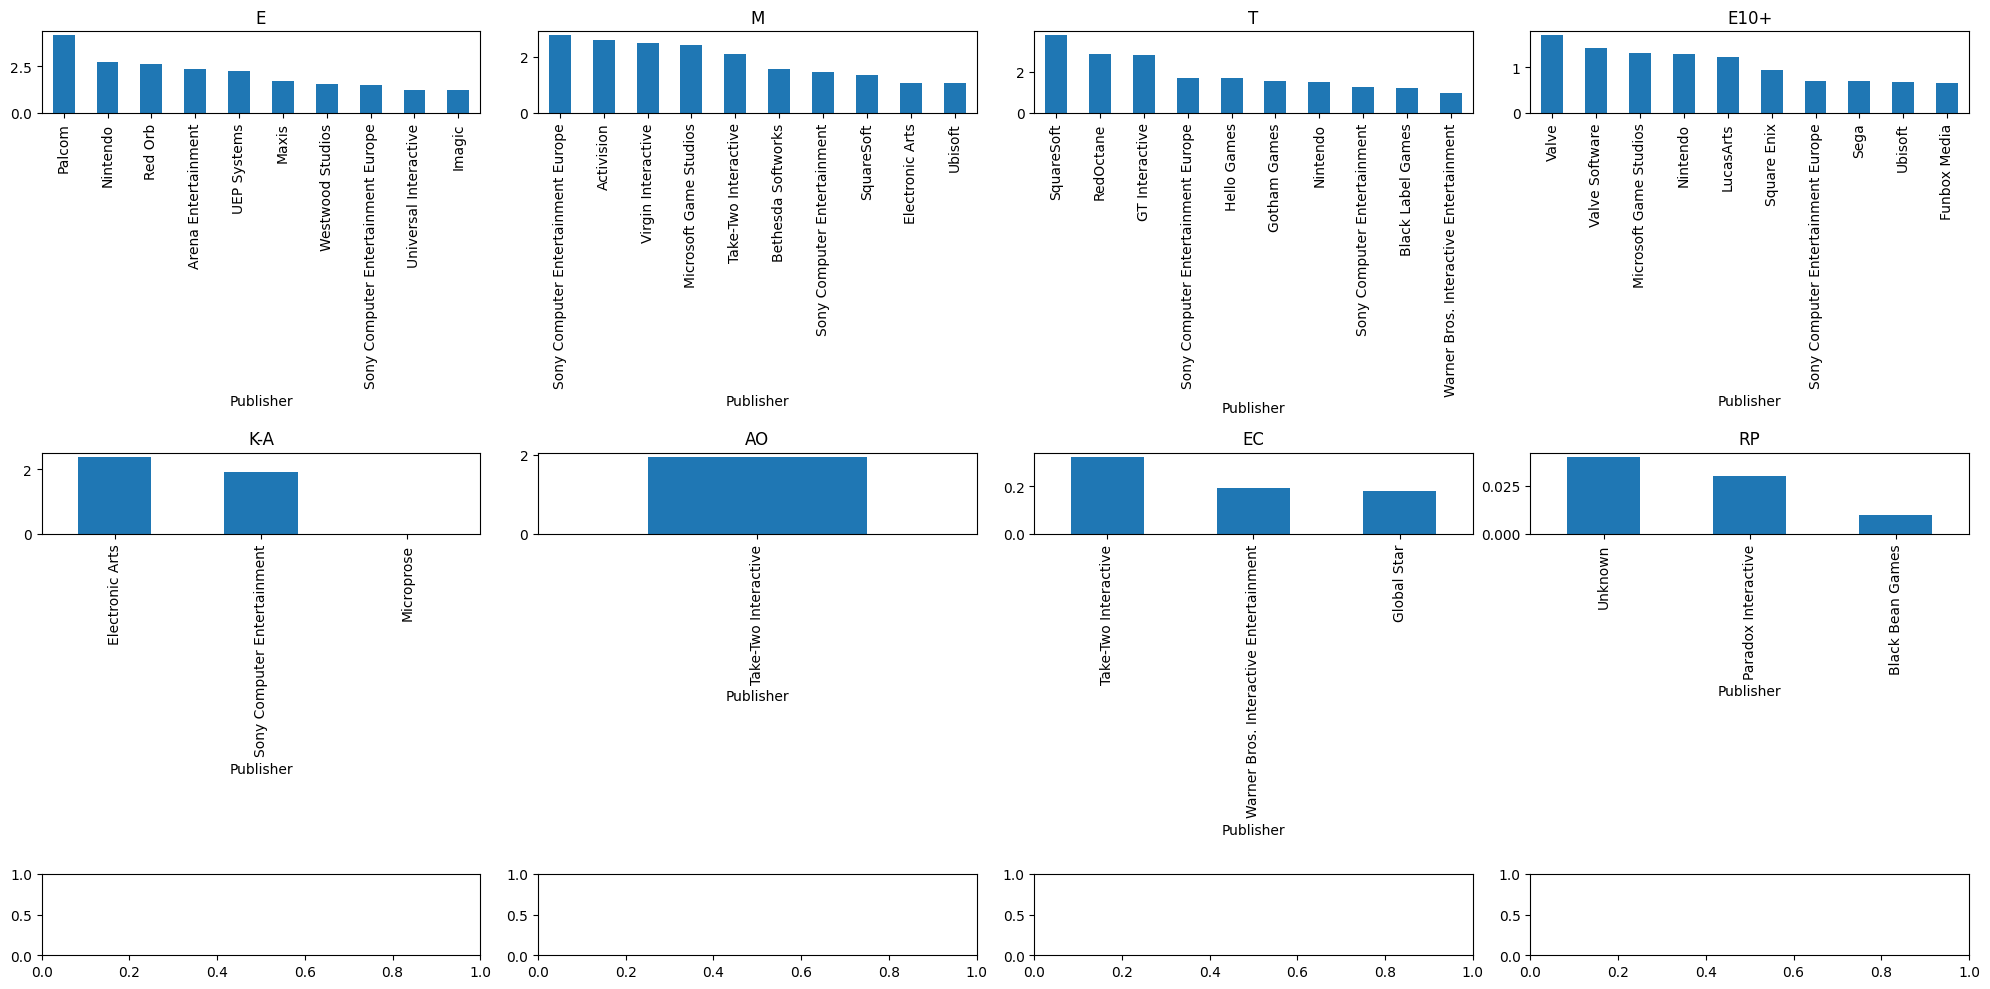

In [14]:
sub_blot(df, "Rating", "Publisher", "Global_Sales", "Mean Global Sales by Publisher for each Genre","bar")

### Critic score VS Global sales for each publisher
    - There'are some publisher have very high score and sales mean while other 
      has less which may indicate that really publisher could affect sales of a game

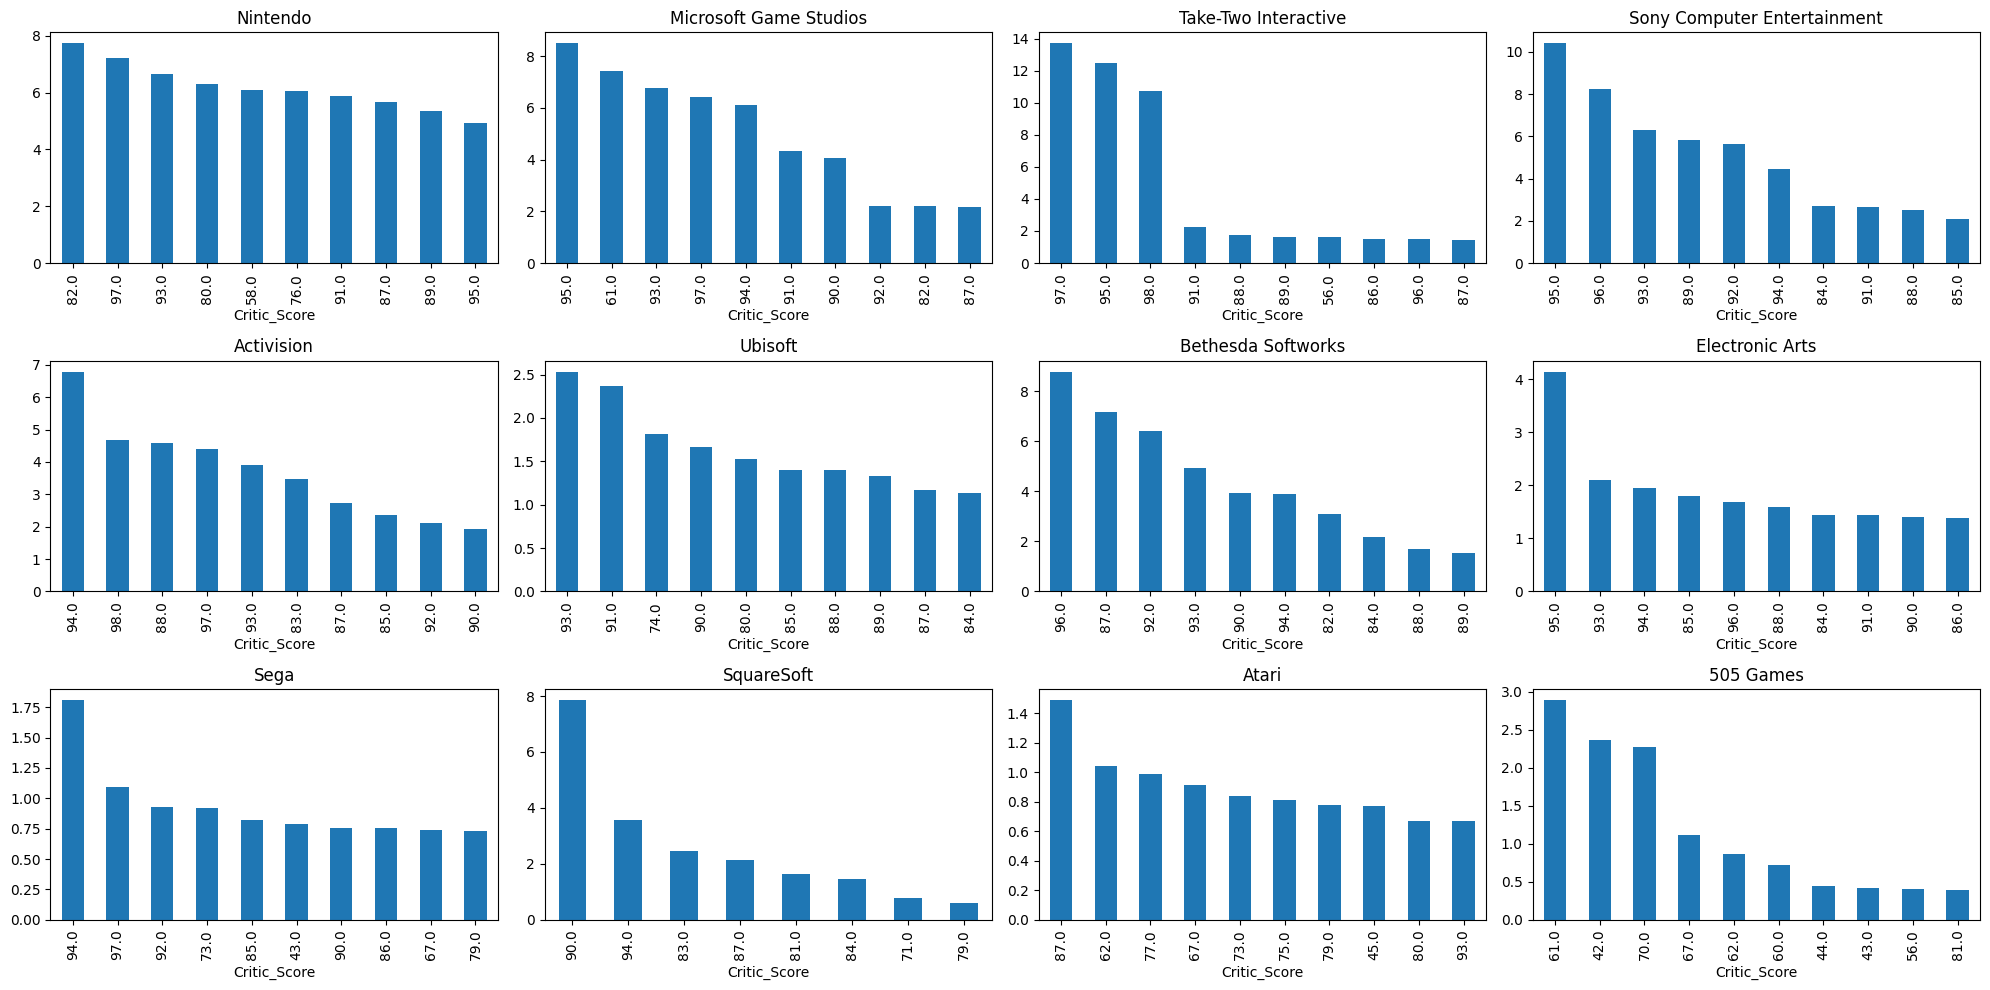

In [15]:
sub_blot(df, "Publisher", "Critic_Score", "Global_Sales", "Mean Global Sales by Publisher for each Genre","bar")

## Hypothesis Test
     Use T-test to test the relationship between a numerical variable (Global Sales)
     and a categorical variable (Publisher name) we want to test if publisher name 
     really affects the sales so we claim that games published by certain publishers
     (top 3)

    
   - null hypothesis: Publisher has no effect on the global sales of a game
     
   - alternative hypothesis: Publisher affects the global sales of 
   



### ANOVA Test
     - We will use (Analysis of Variance) test which is a statistical technique 
       used to determine whether there are significant differences between the 
       means of groups of different publishers.


In [16]:
ANOVA_test(df, "Publisher", "Global_Sales", cats=publisher_sales.index)

P-value:  0.999914971171575
F-value:  0.07035730855950711


### Correlation

In [17]:
correlation_coefficient(df, "Publisher", "Global_Sales", cats=publisher_sales.index)

Correlation coefficient:  0.07205225842701189
Correlation coefficient:  0.2684255174662273


## 3- Comparing Expectations to data:
        from the plot we can see that there is a significant difference between
        the mean global sales of games for each publisher.
        So Expectations match data.
